I've been teaching a crash course in data science with Python, which starts off with learning Python itself. The target audience is Java programmers (generally senior level) so its assumed that things like classes and methods are well understood. The focus is mostly on what is different with Python. I teach it using Jupyter notebooks but the content is useful as a blog post too so here we go:

## Introduction

### Python's Origins

Python was conceived in the late 1980s, and its implementation began in December 1989 by Guido van Rossum at Centrum Wiskunde & Informatica (CWI) in the Netherlands as a successor to the ABC language. It takes its name from Monty Python's Flying Circus.

Python is a dynamic language but is strongly typed (i.e. variables are untyped but refer to objects of fixed type).

> ### How Python Evolves
> 
> Python evolves in a fairly straightforward way, more-or-less like this:
> 
> - people propose changes by writing *Python Enhancement Proposals* (PEPs): https://www.python.org/dev/peps/
> - the Python core committee will assign a 'dictator' who will decide whether the PEP is worthy of becoming part of the standard, and if so it does, after some amount of discussion and revision
> - disagreements are finally settled by Guido van Rossum, Python's inventor and the 'Benevolent Dictator for Life' (BDFL)
> 
> An important standard PEP is the Style Guide, PEP-8 (https://www.python.org/dev/peps/pep-0008/). By default, PyCharm will warn of any PEP-8 violations. There are external tools such as `flake8` (https://gitlab.com/pycqa/flake8) that can be used to check code for compliance in other environments.


### StackOverflow is your friend!

For Python questions and Python data science questions, make use of StackOverflow. Pay attention to comments on suggested answers; the "accepted answer" is often not the best. Look for comments about whether it is the "most Pythonic". Python has an idiomatic style different to many other languages and so a novice coming from another language will often accept an answer that is closer to idiomatic in that other language rather than Python.

https://stackoverflow.com/questions/tagged/python

Also, if you're struggling to understand some code in your early days with Python, you may find this 'execution visualizer' helpful:

http://pythontutor.com/

### "Batteries Included"

Python is often described as having "batteries included". This is a reference to the rich set of libraries (packages)included in the standard distribution as well as the vast collection of freely available packages that can be used to bootstrap your development. Or, as Randall Munroe puts it:

![](https://imgs.xkcd.com/comics/python.png)

There are many thousands of Python packages available, often giving you many choices for similar purposes. One way to find quality packages is to look the curated lists at https://python.libhunt.com/ and https://awesome-python.com/

### Python 2.7 or Python 3.x?

You can use conda to create a Python 2.7 virtual environment for when you have to use 2.7, but all new projects should be Python 3.5 or later. Python 2.7 is the end of the 2.x line and will be end-of-lifed on Jan 1, 2020. Avoid it; the only reason to use it is if there is a package you really need that hasn't been ported yet.

## Python docs

https://docs.python.org/3/ has very detailed documentation.

Most Python packages have good documentation at https://readthedocs.org/

If you use Python a lot on a Mac you may find Dash useful; it is a utility that gives you fast access to context-sensitive help for many libraries: https://kapeli.com/dash

That said, Python has a help() function that is very useful.

## Using the REPL

To start the REPL (read-execute-print loop, or interactive interpreter), just type `python` at the command line.

Use the `help()` function to read the documentation for a module/class/function. As a standalone invocation, you enter the help system and can explore various topics.

Python scripts are stored in plain text files with `.py` extensions. You can run the script `foo.py` at the command line by invoking:

    python foo.py
    
When you do so the Python interpreter will compile the script to an intermediate bytecode, and the result will be stored in a file with the same base name and a `.pyc` extension. As an optimisation, the interpreter will look to see if a `.pyc` file with a more recent file modification date exists when you invoke it to run a script and use that if it does. In Python 2.x these files were saved alongside the Python source files but in Python 3.x they are stored in a subdirectory named `__pycache__`.

> ### A better REPL: bpython
> 
> bpython is an alternative REPL that adds a number of useful features at the command line, like syntax highlighting and auto-completion. 
> 
> https://www.bpython-interpreter.org/
> 
> You can install with `pip install bpython`.
> 
> If you're going to use the command line repl I recommend it, although there are other options too that I haven't tried:
> 
> - ptpython https://github.com/jonathanslenders/ptpython
> - DreamPie http://dreampie.sourceforge.net/
> 
> Yet another alternative to the REPL, of course, is Jupyter.
> 
> For the hard-core Pythonista, you can replace your entire shell with one based on Python; see http://xon.sh/.

## Quickstart - A Simple Example

Before diving into the details, let's look at a simple Python script to get a quick taste of what's to come. We're not going to go into details here but have annotated the code with some comments and if you are familiar with other object-oriented languages this should be quite easy to understand. Some things that may be unusual to you:

- No braces; in Python whitespace is significant. This can take some getting used to but isn't as bad as it seems once you do.
- Instance methods require an explicit "this" argument which in Python by convention is called `self` .
- Static methods have a `@staticmethod` decorator.
- The class constructor - of which there can only be one - is called `__init__`.
- Docstrings are specified using actual string literals inline rather than in comments.
- The method to convert to string is named `__str__` not `toString`.
- String formatting is done using embedded code in {} and preceding the string with 'f' (this is new to Python 3.6).

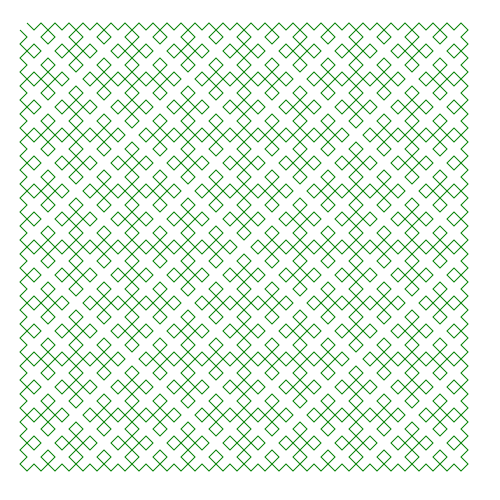

Turtle at -7,-7 facing 315.0


In [1]:
import math  # import math module
from IPython.display import SVG, display

"""
A simple turtle graphics example that produces SVG output that can
be displayed in Jupyter.
"""

class Turtle:
    " Turtle graphics drawing to SVG path "  # class docstring
    
    DEG2RAD = math.pi/180  # class level variable
    
    @staticmethod
    def deg2rad(d):  # static method
        """ Convert degrees to radians """
        return d * Turtle.DEG2RAD
    
    def __init__(self):  # class constructor; "self" is like "this"
        # We don't declare instance variables explicitly in Python; we simply
        # assign values to them during construction. In this case we will
        # do all of that in the reset() method.
        self.reset()
        
    def reset(self):
        self.draw = True  # instance variable
        self.path = "M0,0 "
        self.x = self.y = 0
        self.turnto(0.0)
    
    def turnto(self, angle):
        " Turn to absolute angle. "
        self.angle = angle % 360.0
        self.dx = math.sin(Turtle.deg2rad(self.angle))
        self.dy = math.cos(Turtle.deg2rad(self.angle))
        
    def right(self, angle):
        " Relative turn "
        self.turnto(self.angle + angle)

    def left(self, angle):
        self.right(angle)
        
    def up(self):
        self.draw = False
        
    def down(self):
        self.draw = True
        
    def move(self, distance):
        " Relative move by distance "
        self.x = int(distance * self.dx)
        self.y = int(distance * self.dy)
        self.path += f"{'l' if self.draw else 'm'}{self.x},{self.y} "

    def moveto(self, x, y):
        " Absolute move to (x, y)"
        self.x = x
        self.y = y
        self.path += f"{'L' if self.draw else 'M'}{self.x},{self.y} "
        
    def svg(self):
        return '<svg id="doc" xmlns="http://www.w3.org/2000/svg" ' +\
            'version="1.1" width="500" height="500"><path d="' +\
            self.path +\
            '" stroke="green" fill="none" vector-effect="non-scaling-stroke" /></svg>'
            
    def __str__(self):
        " Convert to string representation. "
        return f"Turtle at {self.x},{self.y} facing {self.angle}"

            
def swisscross(turtle, level):  # top-level function
    " Swiss cross is a space filling curve. "
    if level >= 0:
        swisscross(turtle, level - 1)
        t.right(90)
        swisscross(turtle, level - 1)
        t.move(10)
        swisscross(turtle, level - 1)
        t.right(90)
        swisscross(turtle, level - 1)
        

t = Turtle()  # create class instance; note no 'new' 
t.up()
t.moveto(20, 30)
t.turnto(315)
t.down()
swisscross(t, 5)
t.move(10)
swisscross(t, 5)

# Display the result using SVG
display(SVG(t.svg()))
        
# final state
print(t)

## Installing Third-Party Packages

The standard way to install packages is with `pip install`. However, if you have installed `conda` you should use `conda install` first and only if that fails use `pip install`. Conda has a smaller set of packages which is why it doesn't always succeed, but the ones it does have have been built for Conda so installing that way is preferred.

Use `conda uninstall` or `pip uninstall` to remove packages.

To see what packages are installed use `pip freeze`.

There's a lot more to package installation than this but this is enough for 90%+ of what you will do.

## Python is an OOPL

Python is a pure object-oriented language. Operators like `+` are simply methods on a class. The Python interpreter will convert an infix operator to an instance method call.

For example, there is an `int` class for integers. There is an `__add__` method defined on that class for addition. So:    

In [2]:
3 + 4

7

is the same as:

In [3]:
(3).__add__(4)

7

The double underscore in Python is called *dunder* and is used extensively internally; `__add__` is called a *dunder-method*. Dunder-methods are important to understand if you want to take full advantage of Python hence this early introduction.

You can see the methods on a class by using the `dir` function, for example `dir(int)`.

We will discuss how to define new classes later. A key takeaway here is that this use of dunder-methods allows us to override many operators simply by overriding the associated dunder-method. Two particularly useful ones are `__str__` (cast to string) and `__repr__` (cast to text representation); these are typically the same for a class but need not be. For example, notice the differences here:

In [4]:
a = "abc"
print(a.__str__())  # Equivalent to str(a)
print(a.__repr__())

abc
'abc'


## Indentation and Comments

Python does not use {} for demarcating blocks of code; instead it uses indentation. This distinguishes it from most other programming languages and can take some getting used to. In particular, it requires care when pasting code in an editor (most Python editors are smart about this but other editors are not). The reason for this choice is that Guido originally designed Python as a teaching language and favored readability.

The convention in Python is to indent with spaces, not tabs (this avoids tab settings causing misnterpretation of code). Indentation standard is 4 spaces at a time, although some companies have different conventions (usually 2, if not 4).

Comments start with # and continue to the end of the line. By convention if # is used on the same line as code it should be preceded by at least two spaces.

## Simple Functions

Python named functions are defined with `def`:

In [5]:
def add(a, b):
    return a + b

add(2, 3)

5

In [6]:
add("cat", "hat")  # This is entirely legitimate; + concatenates strings

'cathat'

In [7]:
add("cat", 3)  # This is not allowed; Python typecasting must almost always be explicit

TypeError: must be str, not int

### import

Python code is packaged in the form of _packages_ consisting of one of more _modules_. A module is a single Python file, while a package is a directory of Python modules containing an additional `__init__.py` file, to distinguish a package from a directory that just happens to contain a bunch of Python scripts.

You install a package with `pip` or `conda`. Once installed, to use the package you must import it. You can also import modules although this is less common. 

There are several common ways of importing. Let's say we want to import a package `foo` that defines a class `Widget`:

* `import foo` will import the `foo` package; any reference to modules/classes/functions will need to be prefixed with `foo.`; e.g. `foo.Widget`
* `import foo as bar` will import the `foo` package with the alias `bar`; any reference to modules/classes/functions will need to be prefixed with `bar.`; e.g. `bar.Widget`
* `from foo import Widget` can be used to import a specific module/class/function from `foo` and it will be available as `Widget`
* `from foo import *` will import every item in `foo` into the current namespace; this is bad practice, don't do it.

### Writing a main function and handling command line arguments

The `sys` module lets us access command line arguments as `sys.argv:

```python
    #!/usr/bin/python

    import sys

    def main():
        # print command line arguments
        for arg in sys.argv[1:]:
            print arg

    if __name__ == "__main__":
        main()
```

The `__name__` variable is set to the name of the executing module, or `"__main__"` if this is the top-level module. The pattern shown, where we test `__name__` before executing any code, is a common one; it allows other Python scripts to safely import this one, improving reuse.

If you want to parse command-line arguments like flags etc, there is an `argparse` library as part of the standard distribution but a much easier way IMO is to use `docopt`: just write the help string and `docopt` generates the parse for you: http://docopt.org/. Another option to look at is `click`; it seems to be gaining popularity but I have not used it: http://click.pocoo.org/5/

## An Overview of Python Types

See https://docs.python.org/3/library/stdtypes.html for detailed documentation.

The main types are:

| TYPE      | GROUP     | MUTABLE? |
|-----------|-----------|----------|
| int       | Numerics  | N        |
| float     | Numerics  | N        |
| complex   | Numerics  | N        |
| str       | Sequences | N        |
| bytes     | Sequences | N        |
| bytearray | Sequences | Y        |
| list      | Sequences | Y        |
| tuple     | Sequences | N        |
| range     | Sequences | N        |
| set       | Sets      | Y        |
| frozenset | Sets      | N        |
| dict      | Mapping   | Y        |

In addition, modules, classes, instances, methods, and functions are all types. The Boolean constants `True` and `False`, and the value `None`, are instances of their own special types, and there are several other special cases like this. See the link above for more. Note that there is a string type but not a character type; characters are not treated any differently from other strings.

### The Boolean Truth Value of Types

Any object can be tested for truth value, for use in an `if` or `while` condition or as operand in a Boolean expression.

By default, an object is considered true unless its class defines either a `__bool__()` method that returns False or a `__len__()` method that returns zero, when called with the object. Zero numeric values are considered False, as are empty collections or sequences, and vice-versa.

Operations and built-in functions that have a Boolean result always return `0` or `False` for false and `1` or `True` for true, unless otherwise stated.

Important exception: the Boolean operations `or` and `and` always return one of their operands. This allows for useful defaults using Boolean expressions with `or`:

In [8]:
s = None

name = s or "N/A"

print(name)

N/A


### None

Python has no null object, but has a special object instance `None`.

To test if an object is `None`, use `is` or `is not`, not `==` or `!=`.

In [9]:
a = None
print(a is None)
print(a is not None)

True
False


`is` tests if the arguments refer to the same object, while `==` tests if they have the same value (in general; in reality it does whatever the `__eq__` dunder-method on the left-hand-side argument defines). Python keeps a pool of string literals and reuses them if it can, so in the example below `a` and `b` both refer to the same string literal while `c` does not:

In [10]:
a = "3"
b = "3"
c = f"{3}"
print(a == b)
print(a is b)
print(a == c)
print(a is c)

True
True
True
False


### Numbers

Most of the typical operators you know from other languages are supported. Here are some more-specific to Python:

In [11]:
print(bool(3))  # Convert to Boolean
print(str(3))  # Convert to string
print(bool(0))

True
3
False


In [12]:
print(3 // 2)  # Integer division with truncation
print(3 / 2)  # Float division

1
1.5


In [13]:
print(int(2.5)) # Convert to int with truncation
print(round(2.5))  # Convert to int with rounding (this one is odd; I'd expect it to round up)
print(round(2.5001))  # Convert to int with rounding

2
2
3


In [14]:
print(2 ** 3)  # Exponentiation
print(~3)  # Bitwise inverse
print(2**120)  # Python ints are arbitrary precision, not 64-bit

8
-4
1329227995784915872903807060280344576


In [15]:
print(2.0.is_integer())
print(2.5.as_integer_ratio())  # Convert to fraction tuple; we'll cover tuples later

True
(5, 2)


Note that `+=` and `-=` (and `*=`, etc) are supported but `++` and `--` are not. Use `+=1` and `-=1` instead.

Because even integer literals are objects with some overhead, Python has an optimization where it makes singleton instances of all small integers from -5 to 256. This can in rare situations trip you up. 

In [16]:
a = 256
b = 257
c = -5
d = -6
print(a is 256)
print(b is 257)
print(c is -5)
print(d is -6)

True
False
True
False


### Strings

Python 3 strings are unicode. String literals can use single our double quotes (but must use same type to close as to open). Multi-line strings are most easily written using triple quotes.

In [17]:
print('foo')
print("bar")
print('"foo"')
print("'bar'")
print("""I am a 
multiline string""")

foo
bar
"foo"
'bar'
I am a 
multiline string


You can use the usual suspects of `\n`, `\t`, etc in strings, and use `\` to escape special characters like quotes and `\` itself.

In [18]:
a = "the cat sat on the mat"
print(len(a))  # len gets the length of the string; implemented by __len__

22


In [19]:
print("cat" in a)  # 'in' is implemented by __contains__
print("dog" in a)

True
False


In [20]:
print(a[0])  # Implemented by __getitem__
a[0] = "t"  # No can do; strings are immutable.

t


TypeError: 'str' object does not support item assignment

In [21]:
# Some useful functions. Note these all return copies of the string; strings are immutable!
print(a.lower())
print(a.upper())
print(a.capitalize())  # Capitalize first letter

the cat sat on the mat
THE CAT SAT ON THE MAT
The cat sat on the mat


In [22]:
# Like any object that supports __len__ and __getitem__, strings are sliceable.
# Slicing uses [start:end] or [start:end:increment] where any of these are optional
# start defaults to 0, end to __len__(), and increment to 1. 
# start and end can be positive (from start of string) or negative (from end of string).

print(a[2:])   # skip first two characters
print(a[-7:])  # the last 7 characters
print(a[2:6])  # 4 characters starting after 2nd character
print(a[::2])  # Every second character

e cat sat on the mat
the mat
e ca
tectsto h a


In [23]:
# Use find and rfind to find first/last occurence of a string; return offset or -1 if not found
# You can also use index/rindex which are similar but raise ValueError exception if not found.

print(a.find('he'))
print(a.rfind('he'))
print(a.find('cat'))
print(a.find('dog'))

1
16
4
-1


In [24]:
# You can convert from character to ordinal or vice-versa with ord() and chr()
print(chr(65))
print(ord('A'))

A
65


In [25]:
# Python has no character type, just string. So functions that would apply to just 
# a character in other languages apply to entire string in Python.
print("123".isdigit())
print("1X3".isdigit())
print("NOOOOooo".isupper())

True
False
False


There are many more string operations available; these are just the basics. You can encode and decode strings using other encodings; see https://docs.python.org/3/howto/unicode.html for details.

### Lists

Lists are ordered, mutable sequences. They can be indexed, sliced (more on that below), appended to, have elements deleted, and sorted. They are heterogeneous. Examples:

In [26]:
a = [1, 2, 3, "cat"]

print(a)
print(len(a))  # len() gives the length of the list
print(a[1])  # [] can be used to index in to the list; implemented by list.__getitem__; assignment uses list.__setitem__
print(a[-1])  # negative indices can be used to index from the end of the list (-1 for last element)

[1, 2, 3, 'cat']
4
2
cat


In [27]:
# * can be used to create multiple concanenated copies of a list; implemented by list.__mul__
    
print(a)
a = a * 2 
print(a)

[1, 2, 3, 'cat']
[1, 2, 3, 'cat', 1, 2, 3, 'cat']


In [28]:
# `in` can be used to check for membership; implemented by list.__contains__

print(a)
print('cat' in a)  
print('dog' in a)

[1, 2, 3, 'cat', 1, 2, 3, 'cat']
True
False


In [29]:
print(a)
print(['dog'] + a)  # + can be used to concanetenate lists; implemented by list.__add__
a.append('dog')  # append() can be used for concatenating elements
print(a)

[1, 2, 3, 'cat', 1, 2, 3, 'cat']
['dog', 1, 2, 3, 'cat', 1, 2, 3, 'cat']
[1, 2, 3, 'cat', 1, 2, 3, 'cat', 'dog']


In [30]:
print(a)
print(a.index('dog')) # Get index of first matching entry; throws exception if not found
print(a.count('cat'))  # Count the number of instances of an element

[1, 2, 3, 'cat', 1, 2, 3, 'cat', 'dog']
8
2


In [31]:
print(a)
a.remove('dog')  # Remove first matching instance of element
print(a)
del a[-1]  # Remove element at index; implementedby list.__del__

[1, 2, 3, 'cat', 1, 2, 3, 'cat', 'dog']
[1, 2, 3, 'cat', 1, 2, 3, 'cat']


In [32]:
# reverse() reverses the order of the list in place; implemented by list.__reversed__
print(a)
a.reverse()  
print(a)

[1, 2, 3, 'cat', 1, 2, 3]
[3, 2, 1, 'cat', 3, 2, 1]


In [33]:
# for..in iterates over elements
    
print(a)
for elt in a: 
    print(elt)

[3, 2, 1, 'cat', 3, 2, 1]
3
2
1
cat
3
2
1


In [34]:
# enumerate() will return tuples of index, value
print(a)
for i, v in enumerate(a):
    print(f'Value at index {i} is {v}')  # f'' is a format string that can contain code in {}

[3, 2, 1, 'cat', 3, 2, 1]
Value at index 0 is 3
Value at index 1 is 2
Value at index 2 is 1
Value at index 3 is cat
Value at index 4 is 3
Value at index 5 is 2
Value at index 6 is 1


In [35]:
b = list(a)  # Makes a shallow copy; can also use b = a.copy()
print(b)
print(a == b)  # Elementwise comparison; implemented by list.__eq__
b[-1] += 1  # Add 1 to last element
print(a == b)
print(a > b)  # Compares starting from first element; implemented by list.__gt__
print(a < b)  # Compares starting from first element; implemented by list.__lt__

[3, 2, 1, 'cat', 3, 2, 1]
True
False
False
True


In [36]:
print(a)
a.pop()  # Removes last element
print(a)
a.pop(0)  # removes element at index 0
print(a)

[3, 2, 1, 'cat', 3, 2, 1]
[3, 2, 1, 'cat', 3, 2]
[2, 1, 'cat', 3, 2]


In [37]:
# You can join a list of words into a string
','.join(['cat', 'dog'])

'cat,dog'

In [38]:
# Like any object that supports __len__ and __getitem__, lists are sliceable.
# Slicing uses [start:end] or [start:end:increment] where any of these are optional
# start defaults to 0, end to __len__(), and increment to 1. 
# start and end can be positive (from start of string) or negative (from end of string).
x = [1, 2, 3, 4, 5, 6]
print(x[2:])
print(x[1:3])
print(x[-3:])
print(x[::2])

[3, 4, 5, 6]
[2, 3]
[4, 5, 6]
[1, 3, 5]


In [39]:
# Use insert() to insert at some position. This is done in-place.
x.insert(2, 'A')
print(x)
x.insert(3, [1, 2])  # Note: insert() is for elements, so [1, 2] is a single element, not expanded
print(x)

[1, 2, 'A', 3, 4, 5, 6]
[1, 2, 'A', [1, 2], 3, 4, 5, 6]


In [40]:
a.clear()  # empty the list
print(a)

[]


### Dicts

Dictionaries are mutable mappings of keys to values. Keys must be hashable, but values can be any object. 

---
_Under the hood_

A hashable object is one that defines a `__hash__` dunder-method, and an `__eq__` dunder method; if two objects are equal their hashes must be the same or the results may be unpredictable. 

---


In [41]:
# dict literals (actually a list of dicts in this example)

contacts = [
    {
        'name': 'Alice',
        'phone': '555-123-4567'
    },
    {
        'name': 'Bob',
        'phone': '555-987-6543'        
    }
]
contacts

[{'name': 'Alice', 'phone': '555-123-4567'},
 {'name': 'Bob', 'phone': '555-987-6543'}]

In [42]:
# Use [key] to get an item; this calls dict.__getitem__
contacts[0]['name']

'Alice'

In [43]:
# Use dict[key] = value to change an item; this calls dict.__setitem__
contacts[0]['name'] = 'Carol'
contacts[0]

{'name': 'Carol', 'phone': '555-123-4567'}

In [44]:
# Trying to use a non-existent key raises an exception
contacts[0]['address']

KeyError: 'address'

In [45]:
# You can avoid above and return a default value by using .get()
print(contacts[0].get('name', 'No name'))
print(contacts[0].get('address', 'No address'))

Carol
No address


In [46]:
# Use 'in' to see if a key exists in a dict; this calls dict.__contains__
print('name' in contacts[0])
print('address' in contacts[0])

True
False


In [47]:
# Test for equality with '==' and !=; this calls dict.__eq__ and dict.__ne__
print(contacts[0] == contacts[1])
print(contacts[0] == { 'name': 'Carol', 'phone': '555-123-4567'})

False
True


In [48]:
# Use for-in to iterate over items; this calls dict.__iter__

for x in contacts[0]:
    print(x)

name
phone


In [49]:
# Use len() to get number of items; this calls dict.__len__

print(len(contacts[0]))

2


In [50]:
# Use 'del' to delete a key from a dict; this calls dict.__delitem__

In [51]:
# Use .clear() to empty dict (without changing references)

a = {'name': 'me'}
b = a
a.clear()
b

{}

In [52]:
# Contrast above with assigning empty dict
a = {'name': 'me'}
b = a
a = {}
b

{'name': 'me'}

In [53]:
# Use .keys(), .values() or .items() to get the keys, values, or both

There are some alternative implementations in the `collections` module; you won't need these now but they may come in handy in the future, especially the first two:

* `collections.OrderedDict`s remember the order of insertion so this is preserved when iterating over the entries or keys
* `collections.defaultdict`s can specify a type in the constructor whose return vaslue will be used if an entry can't be found
* `collections.ChainMap`s group multiple dictionaries into a single item for lookups; inserts go in the first dictionary

### Sets

A set is a mutable unordered collection that cannot contain duplicates. Sets are used to remove duplicates and test for membership. One use for sets is to quickly see differences. For example, if you have two dicts and want to see what keys are in one but not the other:

In [54]:
a = {'food': 'ham', 'drink': 'soda', 'desert': 'ice cream'}
b = {'food': 'tofu', 'desert': 'cake'}

set(a) - set(b)

{'drink'}

Sets are less commonly used than lists and dicts and we will not discuss them further here. You can read more here: https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset

### Tuples

Tuples are immutable sequences. Typically they are used to store record type data, or to return multiple values from a function. Tuples behave a lot like lists and support many of the same operations with similar behavior, aside from their immutability. We'll consider them briefly here.

The `collections` package defines a variant `namedtuple` which allows each field to be given a name; we won't go into that here other than to point out its existence. `collections` also defines a `deque` class; stacks are easy to implement just with the built-io list type.

In [55]:
('dog', 'canine')  # tuple

('dog', 'canine')

In [56]:
('dog')  # Not a tuple! This is just a string in parens

'dog'

In [57]:
('dog',)  # For a single-valued tuple, use a trailing comma to avoid above issue

('dog',)

In [58]:
'dog',  # Parentheses are often optional

('dog',)

In [59]:
# Indexing can be used to get at elements, much like lists
print(('dog', 'canine')[0])
print(('dog', 'canine')[1])
print(('dog', 'canine')[-2])
print(('dog',)[0])
print(('dog',)[1])

dog
canine
dog
dog


IndexError: tuple index out of range

In [60]:
# We can unpack a tuple through assignment to multiple variables
a = ('dog', 'bone')
animal, toy = a
print(animal)
print(toy)

dog
bone


In [61]:
# But need to ensure we use the right number of variables
a = ('dog', 'bone')
animal, toy, place = a

ValueError: not enough values to unpack (expected 3, got 2)

In [62]:
a = ('dog', 'bone', 'house')
animal, toy = a

ValueError: too many values to unpack (expected 2)

In [63]:
# Tuples allow us to do a neat trick in Python that is harder in many languages - swap two values without using a
# temporary intermediate.
# Note what is going on here: the RHS of the assignment is creating a tuple; the LHS is unpacking the tuple.

a = 1
b = 2
print(a,b)
a, b = b, a
print(a,b)

1 2
2 1


## Some built-in Functions

See https://docs.python.org/3.6/library/functions.html for a full list and more details.

`abs(num)` - Return absolute value

In [64]:
print(abs(3))
print(abs(-3))

3
3


`all(iterable)` - returns True if all items in the iterable are True

In [65]:
print(all([True, True, True]))
print(all([True, False, True]))

True
False


`any(iterable)` - returns True is any item in the iterable is True.

In [66]:
print(any([False, False]))
print(any([False, True]))

False
True


`filter(fn, iter)` - construct an iterator from the elements of iterable object `iter` for which a function `fn` returns true.

In [67]:
names = ["John Smith", "Alan Alda"]

# Get the names that start and end with same letter
for i in filter(lambda s: s[0].upper() == s[-1].upper(), names):
    print(i)

Alan Alda


`input` - get input from the console

In [68]:
n = input("What is your name?")
print(f'Hello {n}!')

What is your name?Graham
Hello Graham!


`isinstance` - check if an object has a certain type

In [69]:
s = 'abc'
n = 123
print(isinstance(s, int))
print(isinstance(s, str))
print(isinstance(n, int))
print(isinstance(n, str))

False
True
True
False


`iter` - create an sequential iterable from an object; we will discuss iterables later

In [70]:
x = iter([1, 2, 3, 4])
print(x)
print("Before first next()")
print(next(x))  # returns first item and advances
print("Before second next()")
print(next(x))  # returns second item and advances
print("After second next()")
for v in x:  # iterates through remaining items
    print(v)

Before first next()
1
Before second next()
2
After second next()
3
4


`len` - calls the object's `__len__` method to get the length.

`map` - similar to `filter` but returns an iterable with the results of applying the function

In [71]:
names = ["John Smith", "Alan Alda"]

# Get a list of bools, one for each name, specifying if the name starts and ends with the same letter.
print(list(map(lambda s: s[0].upper() == s[-1].upper(), names)))

[False, True]


`max(arg1,...)` - returns the largest arg. If a single iterable arg is given it will iterate.

`min(arg1, ...)` - returns the smallest arg

In [72]:
print(max(2, 3, 1))  # Multiple scalar args
print(max([3, 2, 1])) # Single list arg
print(max([3, 2, 1], 4))  # Not allowed

3
3


TypeError: '>' not supported between instances of 'int' and 'list'

`next` - gets next item from an iterable; see the section on iterables and example for `iter` above.

`repr` - calls the object `__repr__` method to get a string representation. This is the *formal* representation while `__str__` returns the *informal* representation. Another way of thinking about this is that `__str__` returns the value of the object when used as a string, while `__repr__` returns a printable representation of the object's state. In Jupyter, when displaying an object, `__repr__` will be used if possible, with `__str__` used as a fallback. 

`reversed` - makes a copy of the object with items in reversed order (object must support `__len__` and `__getitem__`)

`round` - rounds number to some number of decimal places (default 0)

In [73]:
pi = 3.1415927
print(round(pi))
print(round(pi, 3))

3
3.142


`sorted(list)` - returns a sorted version of the list.

In [74]:
print(sorted([3, 1, 3]))

[1, 3, 3]


`sum(iterable)` - returns the sum of the iterable

In [75]:
print(sum([1, 2, 3]))

6


`type(obj)` - return the type of an object

In [76]:
print(type('foo'))

<class 'str'>


`zip(list, ...)` - combines multiple lists into a single list of tuples. Note this returns a lazy iterable, not a list

In [77]:
print(zip(['a', 'b', 'c'], [1, 2, 3]))
print(list(zip(['a', 'b', 'c'], [1, 2, 3])))  # instantiates the iterable as a list

[('a', 1), ('b', 2), ('c', 3)]


## String Formatting

String formatting has evolved over time with Python. Python 3.6 introduced "format strings" which allow code to be directly embedded in the string. This is an improvement over older approaches and we will use it extensively.
Format strings have an `f` prefix and include code in `{}`. For example:

In [78]:
a = 10
print(f"2 x {a} = {2*a}")

2 x 10 = 20


If you need to use the old approaches, there are a lot of details here: https://pyformat.info/ (this doesn't seem to cover format strings yet though). That site covers things like padding, justification, truncation, leading zeroes, fixing number of decimal places, etc. We won't cover these here except the latter:

In [79]:
a = 1.23456
print(a)
print(f'{a:.2f}')  # Float restricted to two decimal places
print(f'{a:06.2f}')  # Float restricted to two decimal places and padded with leading zeroes if less than 6 chars

1.23456
1.23
001.23


When you use `f'{a}'`, Python will look in turn for a `__format__`, a `__repr__` or a `__str__` method to call to get the string representation of `a`. You can force it to use `__repr__` with `f'{a!r}'` or to use `__str__` with `f'{a!s}'`.

## Sorting

We've already seen the `sorted` function, that can create a sorted list from any iterable:

In [80]:
d = [3,5,2,4,1,7]
for i in sorted(d):
    print(i)

1
2
3
4
5
7


You can do a descending sort by adding a `reverse=True` argument:

In [81]:
for i in sorted(d, reverse=True):
    print(i)

7
5
4
3
2
1


You can sort a list in place with `sort`, but this only applies to lists:

In [82]:
print(d)
d.sort()
print(d)

[3, 5, 2, 4, 1, 7]
[1, 2, 3, 4, 5, 7]


You can read more about sorting here, including how to sort composite objects like dictionaries, tuples and nested lists, and by multiple keys: https://docs.python.org/3/howto/sorting.html

## Statements

Here we will consider statements. We'll leave some statements to when we get to exceptions, functions and classes.

For more info on statements see https://docs.python.org/3/reference/simple_stmts.html

### pass

The `pass` statement is a no-op. This is needed in Python as the language doesn't use braces, so it is the equivalent of `{}` in Java- or C-like languages.

### del

`del` is used to delete an object; it isn't used much but can be useful if the object uses a lot of memory to allow it to be garbage-collected.

### for, break and continue

You can loop over any iterable with `for...in`. `break` and `continue` are supported, and behave in the expected fashion.

In [83]:
for i in ['green eggs', 'ham']:
    print(i)

green eggs
ham


In [84]:
for i in 'green eggs':
    print(i)

g
r
e
e
n
 
e
g
g
s


In [85]:
for i in {'a': 1, 'b': 2}: # This will loop over keys
    print(i)

a
b


In [86]:
for i in {'a': 1, 'b': 2}.values(): # This will loop over values
    print(i)

1
2


In [87]:
for i in {'a': 1, 'b': 2}.items():  # This will loop over key-value pairs as tuples
    print(i)

('a', 1)
('b', 2)


In [88]:
for i in [1, 2, 3]:
    print(i)

1
2
3


In [89]:
for i in enumerate([1, 2, 3]):  # Returns (index, value) tuples
    print(i)

(0, 1)
(1, 2)
(2, 3)


In [90]:
for index, value in enumerate([1, 2, 3]):  # We can unpack the (index, value) tuples
    print(f'At position {index} we have value {value}')

At position 0 we have value 1
At position 1 we have value 2
At position 2 we have value 3


In [91]:
for i in range(1, 10):
    print(i)

1
2
3
4
5
6
7
8
9


In [92]:
for i in range(1, 10, 2):
    print(i)

1
3
5
7
9


Python has an unusual construct: for..else. The else part is executed if there was no early break from the loop.

This is a common construct in other languages:

```python
    # See if the list has an even number and then take an action.
    has_even_number = False
    for elt in [1, 2, 3]:
        if elt % 2 == 0:
            has_even_number = True
            break
    if not has_even_number:
        print "list has no even numbers"
```

but in Python, we can just do:

```python
    for elt in [1, 2, 3]:
        if elt % 2 == 0:
            break
    else:
        print "list has no even numbers"
```

I.e. the `else` statement will be executed if the loop completes normally (does not exit through a `break`).

### while

`while` loops are very straighforward:

In [93]:
i = 0
while i < 10:
    print(i)
    i += 2

0
2
4
6
8


`while...else` is supported:

In [94]:
i = 0
while i < 10:
    print(i)
    i += 2
else:
    print('Done')

0
2
4
6
8
Done


In [95]:
i = 0
while i < 10:
    print(i)
    if i % 2 == 0:
        print('Found an even number!')
        break
    i += 2
else:
    print('No even numbers!')

0
Found an even number!


In [96]:
i = 1
while i < 10:
    print(i)
    if i % 2 == 0:
        print('Found an even number!')
        break
    i += 2
else:
    print('No even numbers!')

1
3
5
7
9
No even numbers!


### if Statement and Boolean Expressions

Python uses `if...elif...else` syntax:

In [97]:
grade = 75
if grade > 90:
    print('A')
elif grade > 80:
    print('B')
elif grade > 70:
    print('C')
else:
    print('D')

C


`and`, `or` and `not` are Boolean operators, while `&`, `|` and `^` are bitwise-operators. Short-circuiting rules apply:

In [98]:
1 and 1/0

ZeroDivisionError: division by zero

In [99]:
1 or 1/0

1

In [100]:
0 and 1/0

0

In [101]:
0 or 1/0

ZeroDivisionError: division by zero

You can combine multiple range comparisons into a single one:

In [102]:
print(0 < 2 < 4)
print(2 < 0 < 4)

True
False


Note that the Boolean literals are `True` and `False`, with capitalized first letters.

In [103]:
print(0 < 2 < 4 < 6)

True


If an instance of a class is used in a Boolean expression, it is evaluated by calling its `__bool__` method if it has one, else its `__len__` method (where non-zero is `True`), else it is considered `True`.

Python doesn't support conditional expressions like `:?` but does support ternary expressions with `if...else`:

In [104]:
for count in range(0, 3):
    print(f'{count} {"Widget" if count == 1 else "Widgets"}')

0 Widgets
1 Widget
2 Widgets


### with

`with` is used for scoped use of classes that need to clean up when they are no longer used (e.g. file objects that need to release underlying file handles). 

The most common place you'll see this is with file reading and writing, which we conver in the next section.

---
> _Under the Hood_
>
> When the “with” statement is executed, Python evaluates the following expression, calls the `__enter__` method on the resulting value (a “context guard”), and assigns whatever `__enter__` returns to the variable given by as. Python will then execute the code body, and no matter what happens in that code, call the guard object’s `__exit__` method.
> 
> As an extra bonus, the `__exit__` method can look at the exception, if any, and suppress it or act on it as necessary (to suppress it, it just needs to return `True`).
> 
> We're getting ahead of ourselves here with classes, but here is an example:

In [105]:
class Wither:
    def __enter__(self):
        return 'green eggs'
    def __exit__(self,  type, value, traceback):
        print('ham')
    
with Wither() as x:
    print(x)

green eggs
ham


## Reading and Writing Files

Python has a built-in `open` function for opening files for reading and writing: https://docs.python.org/3.6/library/functions.html#open

The simplest for of reading a file is just:

```python
with open('myfile.txt') as f:
    for line in f:
        print(line)
```

and writing a file, assuming we have a list of strings `data`:

```python
with open('myfile.txt', 'w') as f:
    for line in data:
        f.write(line)
```

You can see more detailed examples in the tutorial, section 7.2, here: https://docs.python.org/3/tutorial/inputoutput.html

If you are doing more sophisticated operations with files you may want to look at the `pyfilesystem` package: https://www.pyfilesystem.org/. This provides a richer set of functionality over a variety of different "virtual" file systems, like zipfiles, tarfiles, FTP, SMB, DLNA and WebDAV servers, and services like DropBox.

## Functions and Lambdas

Recall that Python named functions are defined with `def`:

In [106]:
def add(a, b):
    return a + b

add(2, 3)

5

Default arguments are allowed. If a default argument is specified, then all following arguments must have defaults as well:

In [107]:
def add(a, b=1):
    print(f'a={a}, b={b}')
    return a + b

print(add(2, 3))
print(add(2))
print(add())

a=2, b=3
5
a=2, b=1
3


TypeError: add() missing 1 required positional argument: 'a'

Arguments with no defaults are "positional" arguments and must be specified in order _except_ if they are named explicitly when calling the function:

In [108]:
print(add(b=2, a=1))

a=1, b=2
3


Variables referenced in a function are either local or arguments. To access a global variable you must explicitly declare it global (but it is better to avoid using globals):

In [109]:
x = 2

def foo():
    x = 1  # This is local
    
print(x)  # This is the global
foo()
print(x)

2
2


In [110]:
x = 2

def foo():
    global x
    x = 1
    
print(x)
foo()
print(x)

2
1


Functions can be nested. In Python 3 you can declare a variable as "nonlocal" to access an outer but non-global scope.

In [111]:
def outside():
    msg = "Outside!"
    def inside():
        msg = "Inside!"  # This is different to the one in outside()
        print(msg)
    inside()
    print(msg)
    
outside()

Inside!
Outside!


In [112]:
def outside():
    msg = "Outside!"
    def inside():
        nonlocal msg  # This is the same as the one in outside()
        msg = "Inside!"
        print(msg)
    inside()
    print(msg)
    
outside()

Inside!
Inside!


It is good practice to follow the `def` line with a _docstring_ to document the function. There are different conventions for how this should be formatted; I like the Google style: http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html

In [113]:
def add(a, b):
    """Adds two objects and returns the result.

    Args:
        a: The first parameter.
        b: The second parameter.

    Returns:
        The result of adding a and b.
    """
    return a + b

# Now we can use help() to get the docstring.
help(add)

Help on function add in module __main__:

add(a, b)
    Adds two objects and returns the result.
    
    Args:
        a: The first parameter.
        b: The second parameter.
    
    Returns:
        The result of adding a and b.



You can return multiple values from a function (really just a tuple):

In [114]:
def sum_diff(a, b):
    return a+b, a-b

print(sum_diff(3, 2))
x, y = sum_diff(4, 5)
print(x)
print(y)

(5, 1)
9
-1


Python supports continuations with yield (this returns a generator which we will dicuss later):

In [115]:
def get_next_even_number(l):
    for v in l:
        if v % 2 == 0:
            yield v
    
x = [1, 2, 3, 4, 5, 6]
for e in get_next_even_number(x):
    print(e)

2
4
6


You can use `*args` for a variable number of non-keyword arguments, which will be available internally as a list:

In [116]:
def multiply(*args):
    z = 1
    for num in args:
        z *= num
    return z
    
print(multiply(1, 2, 3, 4))

24


In [117]:
def foo(*args):
    for i in range(0, len(args)):
        print(f'Argument {i} is {args[i]}')

        
foo(1, 2, 'cat')

Argument 0 is 1
Argument 1 is 2
Argument 2 is cat


For keyword arguments, you can use `**kwargs`, which will be available internally as a dictionary:

In [118]:
def foo(*args, **kwargs):
    for i in range(0, len(args)):
        print(f'Positional argument {i} is {args[i]}')
    for k, v in kwargs.items():
        print(f'Keyword argument {k} is {v}')
        
foo('cat', 1, clothing='hat', location='mat')

Positional argument 0 is cat
Positional argument 1 is 1
Keyword argument clothing is hat
Keyword argument location is mat


You can mix all types of arguments but the order is important:
* Formal positional arguments
* `*args`
* Keyword arguments
* `**kwargs`

You can do the opposite as well - pass a list instead of several positional arguments, and a dictionary instead of several keyword arguments, by using `*` and `**`:

In [119]:
def foo(pos1, pos2, named1='a', named2='b'):
    print(f"Positional 1 is {pos1}")
    print(f"Positional 2 is {pos2}")
    print(f"Named1 is {named1}")
    print(f"Named1 is {named2}")    
    
p = [1, 2]
n = {'named1': 'cat', 'named2': 'hat'}
foo(*p, **n)

Positional 1 is 1
Positional 2 is 2
Named1 is cat
Named1 is hat


The above is actually a common pattern in Python when writing wrapper functions that need to support arbitrary arguments that they are just going to pass on to some other function. For example, say we wanted to write a wrapper that timed the execution of a function:

In [120]:
import datetime as dt


def foo(a, b=None, c=None):
    print(f'a={a}, b={b}, c={c}')


def log_time(fn, *args, **kwargs):
    start = dt.datetime.now()
    fn(*args, **kwargs)
    end = dt.datetime.now()
    print(f"{fn} took {(end-start).microseconds} microseconds")
    
log_time(foo, 1, c='hello')
    

a=1, b=None, c=hello
<function foo at 0x10ff6dae8> took 58 microseconds


Note that `def` statements are executed at their level of indentation, and they create function objects that can be called later, including evaluating the default argument values. This means you should be careful when specifying default values for arguments; stick to scalar variables. In particular avoid using things like empty lists! Look at how this can go wrong:

In [121]:
def beware(a=[]):
    print(a)
    a.append('gotcha!')
    
beware()
beware() # No longer empty list!

[]
['gotcha!']


What heppened above is that the empty list argument was created at function definition time, and at function call time a is assigned a default value which is a reference to the previously created list object. If the list changes those changes will persist.

Instead, use something like:

In [122]:
def beware(a=None):
    if a is None:
        a=[]
    print(a)
    a.append('gotcha!')
    
beware()
beware() # Now we are safe

[]
[]


Finally, you can use `lambda` to define anonymous functions. These will be very useful when we get to using Pandas for data manipulation:

In [123]:
adder = lambda a, b: a + b

adder(1, 2)

3

## Classes

In [124]:
class Widget:  # same as "class Widget(object):"
    """ This is a Widget class. """  # Classes have docstrings too.
    
    def print_my_class(self):  # Instance method as it has a 'self' parameter
        """ Print the instance class. """
        print(self.__class__)  # __class__ is the easy way to get at an object's class
    
    @staticmethod
    def print_class():  # Static method as it has no 'self' parameter
        """ Print the class class. """
        print(Widget)
        
        
x = Widget()  # We don't use 'new' in Python
x.__doc__  # __doc__ has the docstring

' This is a Widget class. '

In Python, we can declare a class with `class(base)`. If the base class is omitted then `object` is assumed.

As mentioned earlier, instance methods take an explicit `self` first parameter which references the instance. So if `widget` is an instance of a `Widget` class and we call:

```python
widget.foo()
```

internally that gets converted to the equivalent of:

```python
Widget.foo(widget)
```

To declare an instance method, we omit the `self` argument and use a `staticmethod` decorator. The latter prevents the instance being passed as a parameter when we call the method from that instance.

In [125]:
help(x)

Help on Widget in module __main__ object:

class Widget(builtins.object)
 |  This is a Widget class.
 |  
 |  Methods defined here:
 |  
 |  print_my_class(self)
 |      Print the instance class.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  print_class()
 |      Print the class class.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [126]:
x.print_my_class()

<class '__main__.Widget'>


In [127]:
x.print_class()

<class '__main__.Widget'>


In [128]:
Widget.print_class()

<class '__main__.Widget'>


In [129]:
Widget.print_my_class()

TypeError: print_my_class() missing 1 required positional argument: 'self'

Note that if we had:

```python
class Foo():
     def s1():
         print('s1')

     @staticmethod
     def s2():
         print('s2')
```

then we could call `Foo.s1()` or `Foo.s2()` with no issues, but if `foo` was an instance of `Foo`, while we could call `foo.s2()` without a problem, if we called `foo.s1()` we would get an error:

```
TypeError: s1() takes 0 positional arguments but 1 was given
```

because Python would try to pass the instance as a parameter as it is missing @staticdecorator.

We can get the docstring of the class and more with `help`:

In [130]:
help(Widget)

Help on class Widget in module __main__:

class Widget(builtins.object)
 |  This is a Widget class.
 |  
 |  Methods defined here:
 |  
 |  print_my_class(self)
 |      Print the instance class.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  print_class()
 |      Print the class class.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



### Constructors and visibility

A class does not require a constructor, but can have (at most) one. The constructor is an instance method named `__init__`. It can take additional parameters other than `self`.

Python does not support private or protected members. By convention, private members should be named starting with an underscore, but this is an 'honor system'; everything is public. Also by convention, you should avoid double underscores; that should be reerved for dunder-methods.

In [131]:
class Bug:
    """ A class for creepy crawly things. """
    
    heads = 1  # This is a class variable
    
    def __init__(self, legs=6, name='bug'):
        self.legs = legs  # Any variable assigned to with self.var = ... in constructor is an instance variable
        self.name = name
    
    @staticmethod
    def _article(name):  # 'private' class method
        """ Return the English article for the given name. """
        return 'an'if 'aeiouAEIOU'.find(name[0]) >= 0 else 'a'

    def article(self):  # 'public' instance method
        """ Return the English article for the given name. """
        return Bug._article(self.name)
    
    def __repr__(self):  # __repr__ is called to get a printable representation of an object
        return f"I'm {Bug._article(self.name)} {self.name} with {self.legs} legs"

# Notice how help() will show help for article() but not _article().
# It respects the '_' convention for 'privacy'.
help(Bug)

Help on class Bug in module __main__:

class Bug(builtins.object)
 |  A class for creepy crawly things.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, legs=6, name='bug')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  article(self)
 |      Return the English article for the given name.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  heads = 1



In [132]:
Bug()

I'm a bug with 6 legs

In [133]:
Bug(legs=8)

I'm a bug with 8 legs

It is recommended to always define a `__repr__` method on your classes.

### Inheritance

Python supports both single and multiple inheritance (which we won't discuss). To up-call to a base method with single-inheritance we use `super()`:

In [134]:
class Insect(Bug):
    
    def __init__(self):
        super().__init__(name='insect')
        
Insect()

I'm an insect with 6 legs

In [135]:
class Spider(Bug):
    
    def __init__(self):
        super().__init__(legs=8, name='spider')
        
Spider()

I'm a spider with 8 legs

### Under the Hood

You can skip this section if you're not interested, but it can be useful to have some understanding of how classes work in Python.

Classes and class instances both have a `.__dict__` attribute that holds their methods and variables/attributes. For example:

In [136]:
class Example:
    """ this is a class docopt string. """
    
    class_var = 'this is a class variable'
    
    def __init__(self):
        """ This is an instance docopt string. """
        self.instance_var = 'this is an instance var'
        
    def class_method():
        """ This is a class method docopt string. """
        pass
    
    def instance_method(self):
        return self.instance_var
    
Example.__dict__

mappingproxy({'__dict__': <attribute '__dict__' of 'Example' objects>,
              '__doc__': ' this is a class docopt string. ',
              '__init__': <function __main__.Example.__init__>,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'Example' objects>,
              'class_method': <function __main__.Example.class_method>,
              'class_var': 'this is a class variable',
              'instance_method': <function __main__.Example.instance_method>})

In the case of classes we really have a special object, a `mappingproxy`; this is a wrapper around a dictionary that makes it read-only and enforces that all keys are strings.

In [137]:
# Similarly for an instance, although this really is a dict, not a mappingproxy.
e = Example()
print(e.__dict__)
print(e.__dict__.__class__)

{'instance_var': 'this is an instance var'}
<class 'dict'>


In [138]:
# Instances have a .__class__ attribute that points to their class.
e.__class__

__main__.Example

In [139]:
# To change a class variable, qualify with the class name:

e2 = Example()
print(e.class_var)
print(e2.class_var)

Example.class_var = 'Changed class var'

# Note how it is changed for all instances
print(e.class_var)
print(e2.class_var)

this is a class variable
this is a class variable
Changed class var
Changed class var


In [140]:
# If you qualify with an instance instead, you'll end up creating an instance variable instead!
e2.class_var = 'e2 class var is actually an instance var'
print(e.class_var)
print(e2.class_var)
print(e.__dict__)
print(e2.__dict__)

Changed class var
e2 class var is actually an instance var
{'instance_var': 'this is an instance var'}
{'instance_var': 'this is an instance var', 'class_var': 'e2 class var is actually an instance var'}


In [141]:
# When we dereference an instance method, we get a *bound method*; the instance method bound to the instance:
e.instance_method

<bound method Example.instance_method of <__main__.Example object at 0x10fe224e0>>

In [142]:
# We can save a reference to the bound method and call it later and it will use the right instance

f = e.instance_method
e.instance_var = 'e\'s instance var'
f()

"e's instance var"

There's a lot more to it than this, but this should give you some idea of how Python can support monkey-patching at run-time and other flexibility.

## Exceptions

You can raise an exception with the `raise` statememt. You can give an instance of any class that derives from the `BaseException` class. You can catch exceptions using `try: except:`. If you want to get a reference to the exception, use `catch..as..`:

In [143]:
try:
    raise Exception('The dude minds, man!')
except Exception as x:  # Exception is the type of exception to catch, x is the variable to catch it with.
    print(x)
    
# You can catch different types of exceptions, and you can use 'raise' on its own in the exception handling
# block to rethrow the exception.

def average(seq):
    "Compute the average of an iterable. "
    try:
        result = sum(seq) / len(seq)
    except ZeroDivisionError as e:
        return None
    except Exception:
        raise
    return result

print(average([]))
print(average(['cat']))

The dude minds, man!
None


TypeError: unsupported operand type(s) for +: 'int' and 'str'

## Comprehensions

Comprehensions are a powerful feature in Python, allowing lists, dictionaries and tuples to be constructed from iterative computations with minimal code. These are best illustrated by examples:

In [144]:
# A list of all squares from 1 to 25
[x*x for x in range(1, 6)]

[1, 4, 9, 16, 25]

In [145]:
# A list of all squares from 1 to 1024 except those divisble by 5
[x*x for x in range(1, 33) if (x*x) % 5 != 0]

[1,
 4,
 9,
 16,
 36,
 49,
 64,
 81,
 121,
 144,
 169,
 196,
 256,
 289,
 324,
 361,
 441,
 484,
 529,
 576,
 676,
 729,
 784,
 841,
 961,
 1024]

In [146]:
# Comprehensions can be nested
t = [
    ['1', '2'],
    ['3', '4']
]

# Make a list of lists from t where we convert the strings to floats
[[float(y) for y in x] for x in t]

[[1.0, 2.0], [3.0, 4.0]]

In [147]:
# Dictionary comprehension
{ f'Square of {x}': x*x for x in range(1, 6)}

{'Square of 1': 1,
 'Square of 2': 4,
 'Square of 3': 9,
 'Square of 4': 16,
 'Square of 5': 25}

## Iterators and Generators

A Python iterator is an object with a `__next__` method for sequential access, that raises a StopIteration when done.

A Python iterable is an object that defines a `__getitem__` method that can take sequential integer indices starting from 0 (so not necessarily random access) and raises an IndexError when done, or that has an `__iter__` method which returns an iterator.

See https://docs.python.org/3/tutorial/classes.html#iterators for more; here's an example from that link:

In [148]:
class Reverse:
    """Iterator for looping over a sequence backwards."""
    def __init__(self, data):
        self.data = data
        self.index = len(data)

    def __iter__(self):
        return self

    def __next__(self):
        if self.index == 0:
            raise StopIteration
        self.index = self.index - 1
        return self.data[self.index]
    
for char in Reverse("spam"):
    print(char)

m
a
p
s


A generator is an easier way of creating an iterable, by simply writing a function that uses `yield` instead of `return`. For example, we can write a generator for Fibonacci numbers like this:

In [149]:
def fibonacci():
    x = 1
    y = 0
    while True:
        lasty = y
        y += x
        x = lasty
        yield y
        
#f = fibonacci()
for i in fibonacci():
    print(i)
    if i > 100:
        break

1
1
2
3
5
8
13
21
34
55
89
144


It is worth noting that using these is very idiomatic to Python normally (see the *Fluent Python* book for example), but in the data science domain, this idiom is more commonly replaced by vectorising. This web-based book goes deep into this different way of thinking: http://www.labri.fr/perso/nrougier/from-python-to-numpy/

## async/await

Python runs as a single-threaded process. That means things like I/O can slow things down a lot. It is possible to use multiple threads - there are several libaries for that - but even with a single thread big improvements are possible with async code. The details are beyond the scope of the bootcamp, but more info is available here: https://docs.python.org/3/library/asyncio-task.html. Recent changes in Python have made this much more powerful, flexible and easy to use.

## Type Annotations

Python has some mechanisms for doing optional type annotations. These can improve execution speed and there are some packages that can enforce type checking at run-time. It's not a bad idea to start using these but they're out of scope of this bootcamp. 

See https://docs.python.org/3/library/typing.html and http://mypy-lang.org/ for more.


## Logging

See https://opensource.com/article/17/9/python-logging for detals on Python logging.

I recommend looking at Daiquiri, which biulds on top of the standard logging library and make things easy:

https://julien.danjou.info/blog/python-logging-easy-with-daiquiri

In [150]:
import sys
!{sys.executable} -m pip install daiquiri

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [151]:
import logging
import daiquiri

daiquiri.setup(level=logging.INFO)

logger = daiquiri.getLogger("bootcamp")
logger.info("It works and logs to stderr by default with color!")

2018-04-12 19:58:17,065 [13060] INFO     bootcamp: It works and logs to stderr by default with color!


## Debugging in the Notebook

You can use the Python debugger pdf within a notebook. Just add this code at the point you want to break execution and enter the debugger:
    
```python
import pdb; pdb.set_trace()
```

Once you're in the debugger, use the command `h` for help to see the commands available.

## Converting between Lists/Dictionaries and JSON

Non-tabular data can be stored in dictionaries, which may be nested and contain lists. This is similar to JSON data on the web and in Javascript, and Python provides a `json` package for converting between these formats.

In [152]:
import json

my_albums = [
    {
        'title': 'Tales of the Inexpressible',
        'artist': 'Shpongle',
        'year': 2001,
        'tracks': [
            { 'title': 'Dorset Perception', 'time': '8:12' },
            { 'title': 'Star Shpongled Banner', 'time': '8:23' },
            { 'title': 'A New Way to Say Hooray!', 'time': '8:32' },
            { 'title': 'Room 2ॐ', 'time': '5:05' },
            { 'title': 'My Head Feels Like a Frisbee', 'time': '8:52' },
            { 'title': 'Shpongleyes', 'time': '8:56' },
            { 'title': 'Once Upon the Sea of Blissful Awareness', 'time': '7:30' },
            { 'title': 'Around the World in a Tea Daze', 'time': '11:21' },
            { 'title': 'Flute Fruit', 'time': '2:09' },
        ],
    }
]

j = json.dumps(my_albums)  # Convert to JSON string
print(type(j))
j

<class 'str'>


'[{"title": "Tales of the Inexpressible", "artist": "Shpongle", "year": 2001, "tracks": [{"title": "Dorset Perception", "time": "8:12"}, {"title": "Star Shpongled Banner", "time": "8:23"}, {"title": "A New Way to Say Hooray!", "time": "8:32"}, {"title": "Room 2\\u0950", "time": "5:05"}, {"title": "My Head Feels Like a Frisbee", "time": "8:52"}, {"title": "Shpongleyes", "time": "8:56"}, {"title": "Once Upon the Sea of Blissful Awareness", "time": "7:30"}, {"title": "Around the World in a Tea Daze", "time": "11:21"}, {"title": "Flute Fruit", "time": "2:09"}]}]'

In [153]:
p = json.loads(j)  # Convert from JSON string to Python object
print(type(p))
p

<class 'list'>


[{'artist': 'Shpongle',
  'title': 'Tales of the Inexpressible',
  'tracks': [{'time': '8:12', 'title': 'Dorset Perception'},
   {'time': '8:23', 'title': 'Star Shpongled Banner'},
   {'time': '8:32', 'title': 'A New Way to Say Hooray!'},
   {'time': '5:05', 'title': 'Room 2ॐ'},
   {'time': '8:52', 'title': 'My Head Feels Like a Frisbee'},
   {'time': '8:56', 'title': 'Shpongleyes'},
   {'time': '7:30', 'title': 'Once Upon the Sea of Blissful Awareness'},
   {'time': '11:21', 'title': 'Around the World in a Tea Daze'},
   {'time': '2:09', 'title': 'Flute Fruit'}],
  'year': 2001}]

## Dates and Times

It's worth briefly discussing Python's support for date and time operations as these are relevant to the exploratory data analysis we will be doing.

The standard library has two modules related to this area:

- `time`, which includes many low-level wrappers around platform C APIs. In particular, routines that convert between epoch time (from Jan 1, 1970) to the various time components found in a C `tm` struct. The most useful functions here are related to getting the system time zone and the `time.sleep()` function which pauses execution;
- `datetime` which provides a more high-level set of functions for dealing with dates, times, and time intervals; this is the module we will focus on here.

In addition to this, there are some good third-party libraries to be aware of, that, amongst other things, provide flexible date parsing operations from different formats. The most commonly used one, that extends the functionality of `datetime`, is `dateutil` (https://dateutil.readthedocs.io/en/stable/) but another that is growing in popularity is `arrow` (http://arrow.readthedocs.io/en/latest/) which provides a completely different approach with a very natural API. 

The `datetime` module (https://docs.python.org/3.6/library/datetime.html) defines five classes:

- `datetime`, combining a date and time
- `date`, a date only with no time component
- `time`, a time of day only, with no date component
- `timedelta`, an interval between two points in time
- `tzinfo`, a class that contains information about a time zone


## Cool Stuff

See https://github.com/tukkek/notablepython

Concise reference: https://github.com/mattharrison/Tiny-Python-3.6-Notebook

The Hitchhikers Guide to Python documents many best practices: http://docs.python-guide.org/en/latest/

Easily progress bars to outer loops (works in Jupyter and console): https://pypi.python.org/pypi/tqdm

For anyone who wants to get really serious about Python, Mark Lutz's and David Beazley's books are good but some are dated, but the best book on the language itself is IMO "Fluent Python" by Luciano Ramalho. There are also many excellent talks at http://pyvideo.org/. 

Blog aggregator for Python: http://planetpython.org/


If you're interested in what the underlying Python byte code looks like for a function or class you can use the `dis` module:

In [154]:
import dis

dis.dis(Widget)

Disassembly of print_class:
 11           0 LOAD_GLOBAL              0 (print)
              2 LOAD_GLOBAL              1 (Widget)
              4 CALL_FUNCTION            1
              6 POP_TOP
              8 LOAD_CONST               1 (None)
             10 RETURN_VALUE

Disassembly of print_my_class:
  6           0 LOAD_GLOBAL              0 (print)
              2 LOAD_FAST                0 (self)
              4 LOAD_ATTR                1 (__class__)
              6 CALL_FUNCTION            1
              8 POP_TOP
             10 LOAD_CONST               1 (None)
             12 RETURN_VALUE



## Going Deeper

### The sys module

`sys.modules` is a dictionary of the currently imported modules:

In [155]:
import sys

sys.modules

{'builtins': <module 'builtins' (built-in)>,
 'sys': <module 'sys' (built-in)>,
 '_frozen_importlib': <module 'importlib._bootstrap' (frozen)>,
 '_imp': <module '_imp' (built-in)>,
 '_warnings': <module '_warnings' (built-in)>,
 '_thread': <module '_thread' (built-in)>,
 '_weakref': <module '_weakref' (built-in)>,
 '_frozen_importlib_external': <module 'importlib._bootstrap_external' (frozen)>,
 '_io': <module 'io' (built-in)>,
 'marshal': <module 'marshal' (built-in)>,
 'posix': <module 'posix' (built-in)>,
 'zipimport': <module 'zipimport' (built-in)>,
 'encodings': <module 'encodings' from '/Users/gram/anaconda/lib/python3.6/encodings/__init__.py'>,
 'codecs': <module 'codecs' from '/Users/gram/anaconda/lib/python3.6/codecs.py'>,
 '_codecs': <module '_codecs' (built-in)>,
 'encodings.aliases': <module 'encodings.aliases' from '/Users/gram/anaconda/lib/python3.6/encodings/aliases.py'>,
 'encodings.utf_8': <module 'encodings.utf_8' from '/Users/gram/anaconda/lib/python3.6/encodings/ut

`sys.path` is the path to look for imports:

In [156]:
sys.path

['',
 '/Users/gram/anaconda/lib/python36.zip',
 '/Users/gram/anaconda/lib/python3.6',
 '/Users/gram/anaconda/lib/python3.6/lib-dynload',
 '/Users/gram/.local/lib/python3.6/site-packages',
 '/Users/gram/anaconda/lib/python3.6/site-packages',
 '/Users/gram/anaconda/lib/python3.6/site-packages/aeosa',
 '/Users/gram/anaconda/lib/python3.6/site-packages/IPython/extensions',
 '/Users/gram/.ipython']

### Using Threads and Processes

See https://medium.com/@bfortuner/python-multithreading-vs-multiprocessing-73072ce5600b

### Extending Python with C code

See https://dbader.org/blog/python-ctypes-tutorial#.

### Functional Programming in Python

See https://docs.python.org/dev/howto/functional.html#iterators and http://coconut-lang.org/

### Making HTTP Requests and Parsing Responses

There are numerous ways to do this in Python, but the most commonly used libraries for these are `requests` (http://docs.python-requests.org/en/master/) and Beautiful Soup (https://www.crummy.com/software/BeautifulSoup/); look at those first before considering anything else as they are powerful, stable, mature and easy to use. Kenneth Reitz, who wrote `requests`, has recently implemented a new library on top of both `requests` and Beautiful Soup: https://github.com/kennethreitz/requests-html

